#

In [24]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [25]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)
# 여기까지가 준비단계

In [26]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model


In [27]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 'matrics' was misspelled, changed to 'metrics'
result = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7596 - loss: 0.6870
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8527 - loss: 0.4096
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8655 - loss: 0.3655
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8761 - loss: 0.3405
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8828 - loss: 0.3262


In [30]:
result.history.keys()

dict_keys(['accuracy', 'loss'])

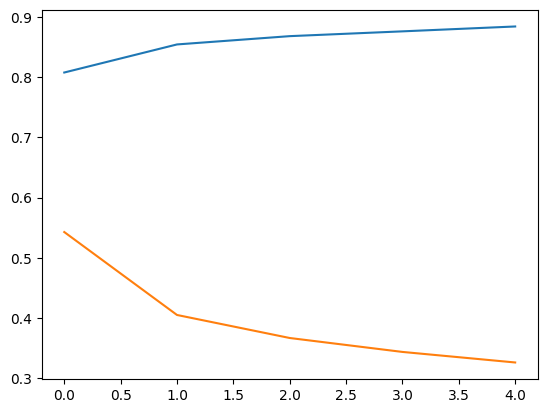

In [32]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])

In [33]:
result = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8892 - loss: 0.3167
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8901 - loss: 0.3093
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8988 - loss: 0.2846
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8987 - loss: 0.2844
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9034 - loss: 0.2705
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9026 - loss: 0.2739
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9080 - loss: 0.2635
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9112 - loss: 0.2525
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9131 - loss: 0.2446
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9148 - loss: 0.2460
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2428
Epoch 12/20
1407/1407 ━━━━━━━━

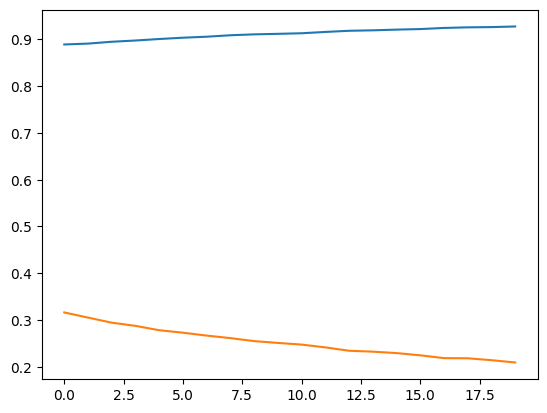

In [35]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])
# 학습만 한 결과이다

In [38]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7599 - loss: 0.6904 - val_accuracy: 0.8501 - val_loss: 0.4346
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8518 - loss: 0.4097 - val_accuracy: 0.8659 - val_loss: 0.3706
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8677 - loss: 0.3664 - val_accuracy: 0.8684 - val_loss: 0.3707
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8757 - loss: 0.3431 - val_accuracy: 0.8612 - val_loss: 0.3961
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8853 - loss: 0.3209 - val_accuracy: 0.8699 - val_loss: 0.3962
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8903 - loss: 0.3075 - val_accuracy: 0.8739 - val_loss: 0.3700
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8926 - loss: 0.2992 - val_accuracy: 0.8795 - val_loss: 0.3655
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8965 - loss: 0.2921 

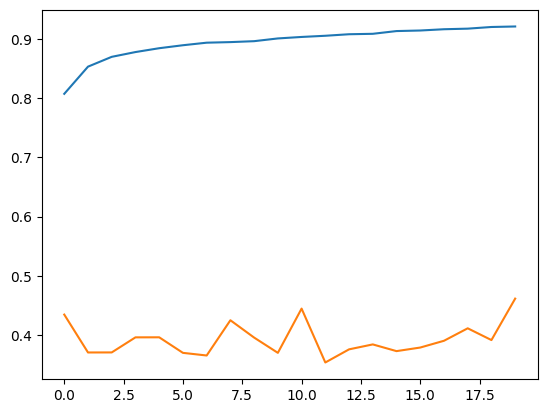

In [40]:
# 이제 학습하면서 검증까지는 마쳤다.
# 과대적합이 되었는지를 보고싶은거였기 때문에 시각화를 하면?!
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_loss']) # 들쭉날쭉한 결과 = 하나의 학습용 데이터만 쓰다보니 과대적합이 되었다
# 들쭉날쭉한 로스율을 평탄화 시켜야 하는 필요(문제이기도 한..)를 발견했다

In [42]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7627 - loss: 0.6834 - val_accuracy: 0.8551 - val_loss: 0.4200
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8527 - loss: 0.4131 - val_accuracy: 0.8592 - val_loss: 0.3927
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8703 - loss: 0.3631 - val_accuracy: 0.8775 - val_loss: 0.3416
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8783 - loss: 0.3360 - val_accuracy: 0.8749 - val_loss: 0.3499
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8866 - loss: 0.3127 - val_accuracy: 0.8825 - val_loss: 0.3259
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8920 - loss: 0.2931 - val_accuracy: 0.8806 - val_loss: 0.3247
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8988 - loss: 0.2759 - val_accuracy: 0.8747 - val_loss: 0.3449
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8994 - loss: 0.2708 

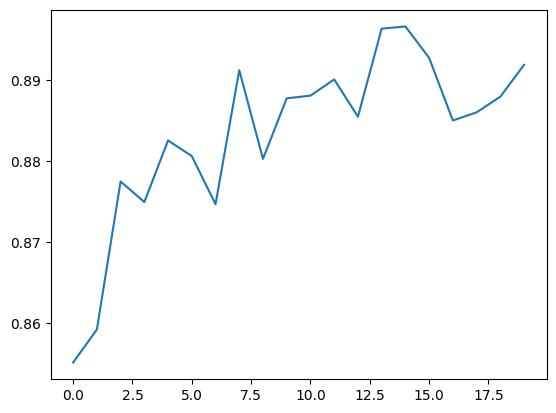

In [43]:
plt.plot(result.history['val_accuracy'])

# 드롭아웃
- 은닉층에 있는 뉴런을 랜덤하게 껐을 때, 출력값이 큰 영향을 받는다면 중요한 뉴런이구나!
- 별 영향을 안받으면, 별로 안중요한 뉴런이구나!
를 알아내는 기능

In [45]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%를 강제로 껐다켰다 해볼게(학습의 효율을 돕기 위해서 있는 기능이므로 파라미터 0으로 나옴)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7286 - loss: 0.7858 - val_accuracy: 0.8586 - val_loss: 0.4037
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8337 - loss: 0.4617 - val_accuracy: 0.8669 - val_loss: 0.3733
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8480 - loss: 0.4215 - val_accuracy: 0.8688 - val_loss: 0.3671
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8552 - loss: 0.3942 - val_accuracy: 0.8709 - val_loss: 0.3498
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8607 - loss: 0.3786 - val_accuracy: 0.8753 - val_loss: 0.3443
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8680 - loss: 0.3651 - val_accuracy: 0.8839 - val_loss: 0.3195
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8684 - loss: 0.3542 - val_accuracy: 0.8835 - val_loss: 0.3268
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8735 - loss: 0.3412 - 

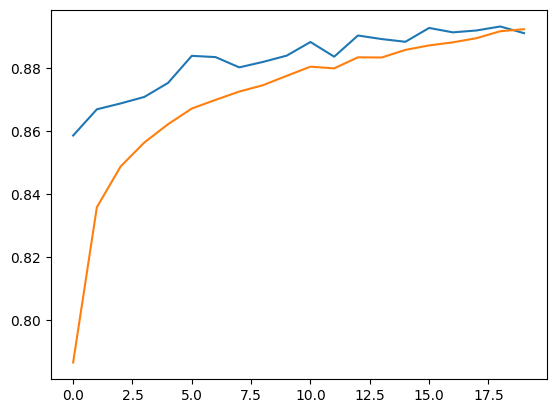

In [48]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])

# 모델 저장과 복원
- 만든 모델을 저장, 복원하여 다른곳에서도 사용하기 위함

In [52]:
model.save_weights('my_model.weights.h5') # 가중치를 저장하는 것
# model.load_weights('my_model.weights.h5')

In [53]:
model.save('my_model.keras')

# 콜백
- 그래프의 경사도가 낮아지가 된다면 전기료 아까우니까 학습 그만시키라고 하는 것
- 이전 상태를 기록 하는 것
- 그리고 조기종료를 시키면 학습을 중단한다

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cp = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True) # 콜백부분
es = keras.callbacks.EarlyStopping(patience=2)

result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[es, cp])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7263 - loss: 0.7812 - val_accuracy: 0.8558 - val_loss: 0.4079
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8348 - loss: 0.4653 - val_accuracy: 0.8616 - val_loss: 0.3788
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8461 - loss: 0.4243 - val_accuracy: 0.8709 - val_loss: 0.3575
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8550 - loss: 0.3970 - val_accuracy: 0.8753 - val_loss: 0.3479
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8617 - loss: 0.3747 - val_accuracy: 0.8781 - val_loss: 0.3317
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8647 - loss: 0.3621 - val_accuracy: 0.8708 - val_loss: 0.3418
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8691 - loss: 0.3539 - val_accuracy: 0.8802 - val_loss: 0.3214
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8718 - loss: 0.3451 -

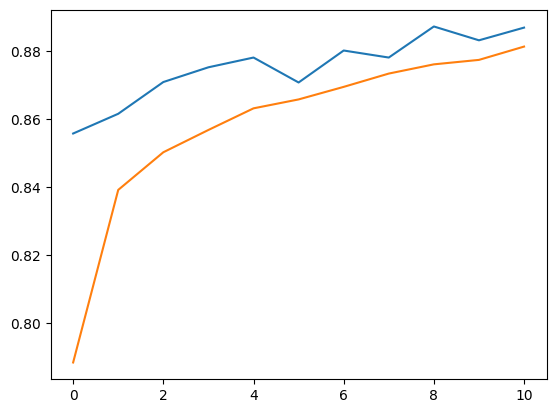

In [59]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])